In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

from ml_models import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

In [3]:
import pandas as pd
df = pd.read_csv('../csvs/general_network.csv')

In [4]:
df.head()

,c_betweeness_centrality,c_closeness_centrality,c_eigenvector_centrality,c_degree_centrality,c_clustering,c_average_clustering,c_average_shortest_path_length,n_connected_components
0,0.001346,0.352022,0.004129,52.0,0.008411,0.013193,2.951671,0.976378
1,0.000962,0.351860,0.003413,47.0,0.007398,0.011388,2.876036,0.984252
2,0.001292,0.359269,0.006416,70.5,0.009389,0.010432,2.938033,0.989501
3,0.001382,0.359889,0.004561,58.0,0.010702,0.010945,2.932031,0.992126
4,0.002201,0.362078,0.006388,62.0,0.009578,0.010881,2.925405,0.984252


In [6]:
import warnings
warnings.filterwarnings('ignore')

models = [{'name':'Linear Regression',
           'model': LinearRegression(),
           'params': dict(
                        fit_intercept = [True, False])
          },
          {'name':'Random Forest',
           'model': RandomForestRegressor(), 
           'params': dict(
                        random_state= [42],
                        n_estimators= [10, 50, 100, 200],
                        max_depth = [3, 4, 5, 6],
                        min_samples_split= [0.005, 0.01, 0.05],
                        min_samples_leaf= [0.005, 0.01, 0.05],
                        criterion = ["friedman_mse", "absolute_error", "poisson", "mean_squared_error"],
                        n_jobs= [-1])},

          {'name':'MLPClassifier',
            'model': MLPRegressor(), 
            'params': dict(
                        random_state = [42],
                        activation =  ["identity", "relu"],
                        learning_rate =  ["constant", "invscaling", "adaptive"],
                        max_iter =  [2000, 2500])}]

In [7]:
model_list = [Model(**model) for model in models]

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=['c_average_clustering', 'c_average_shortest_path_length', 'n_connected_components'])
y = df['n_connected_components']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

evaluated_models = [ModelEvaluator(model = model) for model in model_list]


In [13]:
import seaborn as sns

<AxesSubplot: >

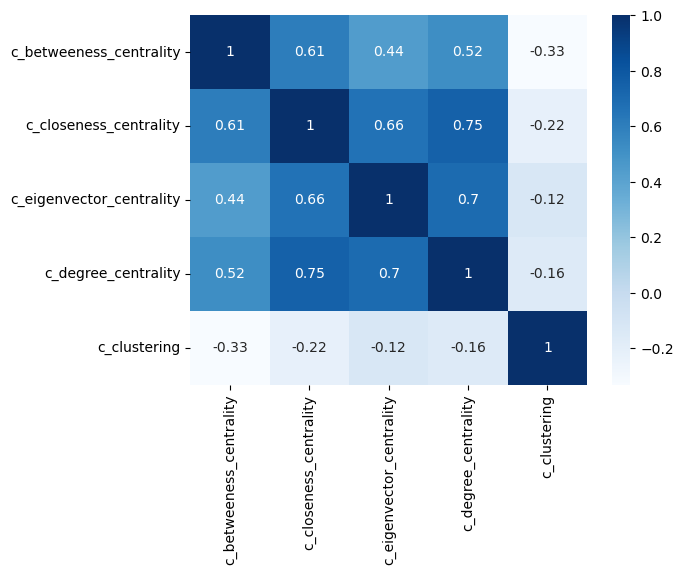

In [16]:
corr = X.corr()

sns.heatmap(corr,cmap="Blues", annot=True)

In [187]:
[model.evaluate(X_train, y_train, X_test, y_test) for model in evaluated_models]

Model: Linear Regression
Best params: {'fit_intercept': True}
Mean Square Error: 0.01
Mean Absolute Error: 0.02
Model: Random Forest
Best params: {'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
Mean Square Error: 0.01
Mean Absolute Error: 0.01
Model: MLPClassifier
Best params: {'activation': 'identity', 'learning_rate': 'constant', 'max_iter': 2000, 'random_state': 42}
Mean Square Error: 0.01
Mean Absolute Error: 0.02


[None, None, None]

In [19]:
feature_names = list(X.columns)

In [189]:
evaluated_models[0].model.model.coef_

array([-7.83891293e-03, -4.02066677e-03,  2.48677452e-05, -2.66193338e-03,
       -1.44143503e-03])

In [190]:
feature_names

['c_betweeness_centrality',
 'c_closeness_centrality',
 'c_eigenvector_centrality',
 'c_degree_centrality',
 'c_clustering']

In [191]:
evaluated_models[1].model.model.feature_importances_

array([0.53390202, 0.09179239, 0.09539652, 0.1827018 , 0.09620727])

In [29]:
import shap

def shap_explain(evaluated_models, model_index, X_train, X_test, feature_names):
    regressor = evaluated_models[model_index].model.model
    regressor.fit(X_train, y_train)

    masker = shap.maskers.Independent(X_train, 10)

    explainer = shap.Explainer(regressor.predict, masker.data)
    shap_values = explainer(X_test)

    shap.summary_plot(shap_values, X_test, feature_names = feature_names)
    return shap_values

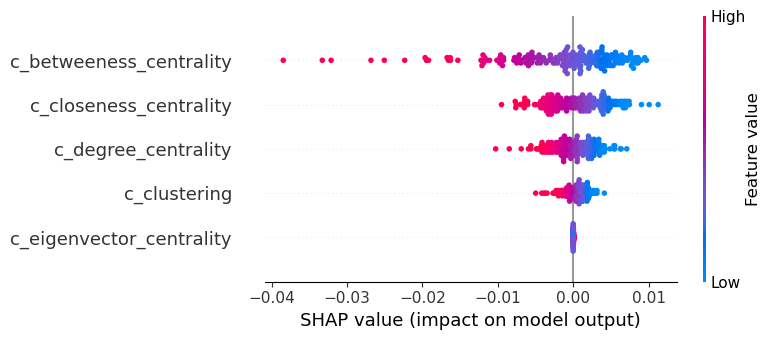

In [30]:
shap_values_linear = shap_explain(evaluated_models, 0, X_train, X_test, feature_names)

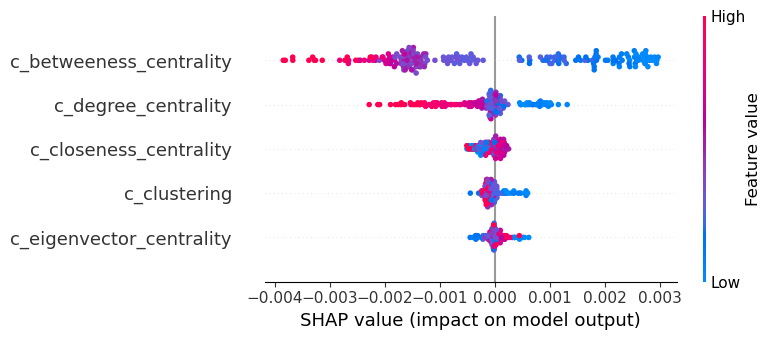

In [194]:
shap_values_rf = shap_explain(evaluated_models, 1, X_train, X_test, feature_names)

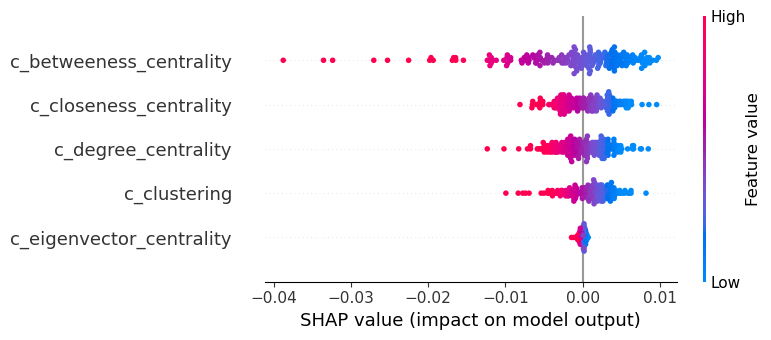

In [195]:
shap_values_mlp = shap_explain(evaluated_models, 2, X_train, X_test, feature_names)

In [196]:
X = df.drop(columns=['c_average_clustering', 'c_average_shortest_path_length', 'n_connected_components'])
y = df['c_average_shortest_path_length']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [197]:
[model.evaluate(X_train, y_train, X_test, y_test) for model in evaluated_models]

Model: Linear Regression
Best params: {'fit_intercept': True}
Mean Square Error: 0.09
Mean Absolute Error: 0.06
Model: Random Forest
Best params: {'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 0.05, 'min_samples_split': 0.05, 'n_estimators': 200, 'n_jobs': -1, 'random_state': 42}
Mean Square Error: 0.08
Mean Absolute Error: 0.05
Model: MLPClassifier
Best params: {'activation': 'identity', 'learning_rate': 'constant', 'max_iter': 2000, 'random_state': 42}
Mean Square Error: 0.09
Mean Absolute Error: 0.06


[None, None, None]

In [198]:
feature_names = list(X.columns)

In [199]:
evaluated_models[0].model.model.coef_

array([-0.01388782, -0.00483406,  0.00498625, -0.00010515, -0.00820633])

In [200]:
evaluated_models[1].model.model.feature_importances_

array([0.10672003, 0.56633559, 0.20654435, 0.07133335, 0.04906668])

In [201]:
feature_names

['c_betweeness_centrality',
 'c_closeness_centrality',
 'c_eigenvector_centrality',
 'c_degree_centrality',
 'c_clustering']

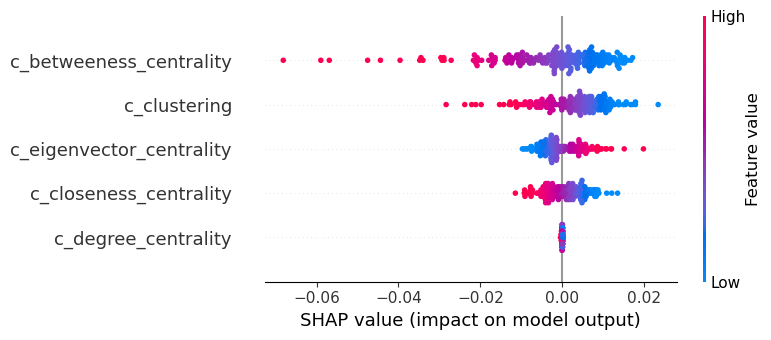

In [202]:
shap_values_linear = shap_explain(evaluated_models, 0, X_train, X_test, feature_names)

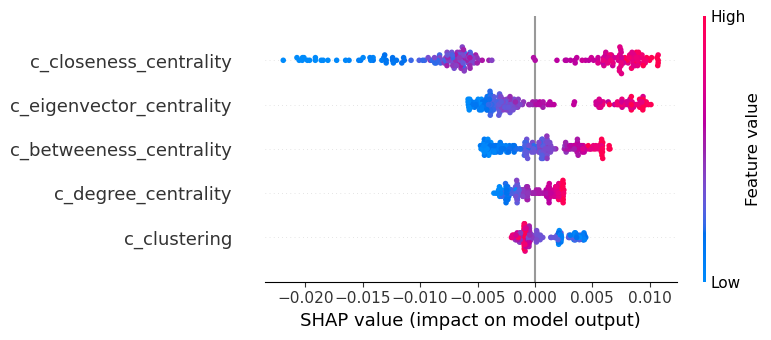

In [203]:
shap_values_rf = shap_explain(evaluated_models, 1, X_train, X_test, feature_names)

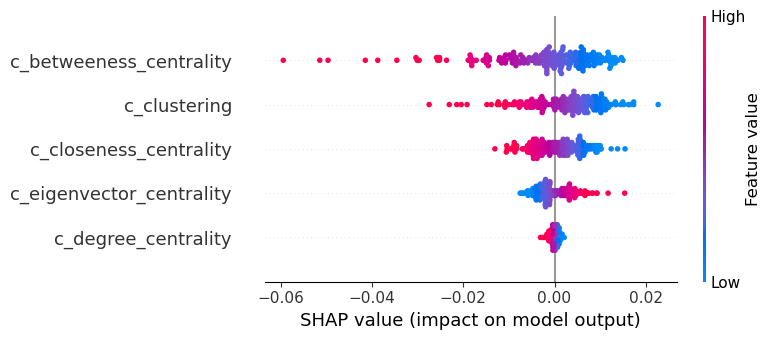

In [204]:
shap_values_mlp = shap_explain(evaluated_models, 2, X_train, X_test, feature_names)